# Why We Need a Cataract Detection Model

- Enables **early diagnosis** to prevent vision loss.
- Provides **automated and accurate screening**, reducing human error.
- Improves accessibility in areas with **limited eye specialists**.
- Offers a **cost-effective** alternative to manual exams.
- Assists doctors in **timely treatment planning**.
- Supports **remote healthcare** through telemedicine.
- Ultimately leads to **better patient outcomes**.


In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Modules for *Classifications*

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader


#data Transformation Defination

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),  # data augmentation
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],  # Imagenet mean
                             [0.229, 0.224, 0.225])  # Imagenet std
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}


#Load the Image Data and seperate in different variables

In [4]:
train_dataset = datasets.ImageFolder('/content/drive/MyDrive/datasets/processed_images/train', transform=data_transforms['train'])
test_dataset = datasets.ImageFolder('/content/drive/MyDrive/datasets/processed_images/test', transform=data_transforms['test'])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


#class to index mapping

In [5]:
print(train_dataset.class_to_idx)
# Output should be something like: {'cataract': 0, 'normal': 1}


{'cataract': 0, 'normal': 1}


#Model declaration

In [6]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # 2 classes: cataract and normal

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 99.4MB/s]


#Define the optimizer and loss function

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


#Train the model

In [8]:
from tqdm import tqdm

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    loop = tqdm(train_loader, leave=True)  # Wrap dataloader with tqdm

    for inputs, labels in loop:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = correct / total

        # Update tqdm bar description
        loop.set_description(f'Epoch [{epoch+1}/{num_epochs}]')
        loop.set_postfix(loss=epoch_loss, accuracy=epoch_acc)

    print(f'Epoch {epoch+1} finished - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}')


Epoch [1/10]: 100%|██████████| 16/16 [03:41<00:00, 13.84s/it, accuracy=0.845, loss=0.458]


Epoch 1 finished - Loss: 0.4576 - Accuracy: 0.8452


Epoch [2/10]: 100%|██████████| 16/16 [02:57<00:00, 11.07s/it, accuracy=0.951, loss=0.152]


Epoch 2 finished - Loss: 0.1517 - Accuracy: 0.9511


Epoch [3/10]: 100%|██████████| 16/16 [02:56<00:00, 11.06s/it, accuracy=0.933, loss=0.182]


Epoch 3 finished - Loss: 0.1822 - Accuracy: 0.9328


Epoch [4/10]: 100%|██████████| 16/16 [02:57<00:00, 11.11s/it, accuracy=0.974, loss=0.0904]


Epoch 4 finished - Loss: 0.0904 - Accuracy: 0.9735


Epoch [5/10]: 100%|██████████| 16/16 [02:55<00:00, 10.99s/it, accuracy=0.992, loss=0.0375]


Epoch 5 finished - Loss: 0.0375 - Accuracy: 0.9919


Epoch [6/10]: 100%|██████████| 16/16 [03:02<00:00, 11.41s/it, accuracy=0.982, loss=0.0591]


Epoch 6 finished - Loss: 0.0591 - Accuracy: 0.9817


Epoch [7/10]: 100%|██████████| 16/16 [02:59<00:00, 11.24s/it, accuracy=0.971, loss=0.0883]


Epoch 7 finished - Loss: 0.0883 - Accuracy: 0.9715


Epoch [8/10]: 100%|██████████| 16/16 [02:58<00:00, 11.16s/it, accuracy=0.982, loss=0.0477]


Epoch 8 finished - Loss: 0.0477 - Accuracy: 0.9817


Epoch [9/10]: 100%|██████████| 16/16 [02:59<00:00, 11.22s/it, accuracy=0.986, loss=0.0333]


Epoch 9 finished - Loss: 0.0333 - Accuracy: 0.9857


Epoch [10/10]: 100%|██████████| 16/16 [02:57<00:00, 11.07s/it, accuracy=0.976, loss=0.0879]

Epoch 10 finished - Loss: 0.0879 - Accuracy: 0.9756


#Evaluate The model

In [9]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f'Test Accuracy: {correct / total:.4f}')


Test Accuracy: 0.9752


results

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [11]:
model.eval()
all_preds = []
all_labels = []
all_images = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_images.extend(inputs.cpu())  # Store images to display later


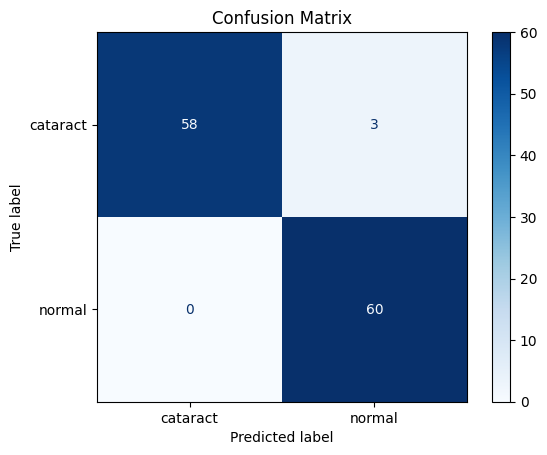

In [12]:
cm = confusion_matrix(all_labels, all_preds)
class_names = train_dataset.classes  # ['cataract', 'normal']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


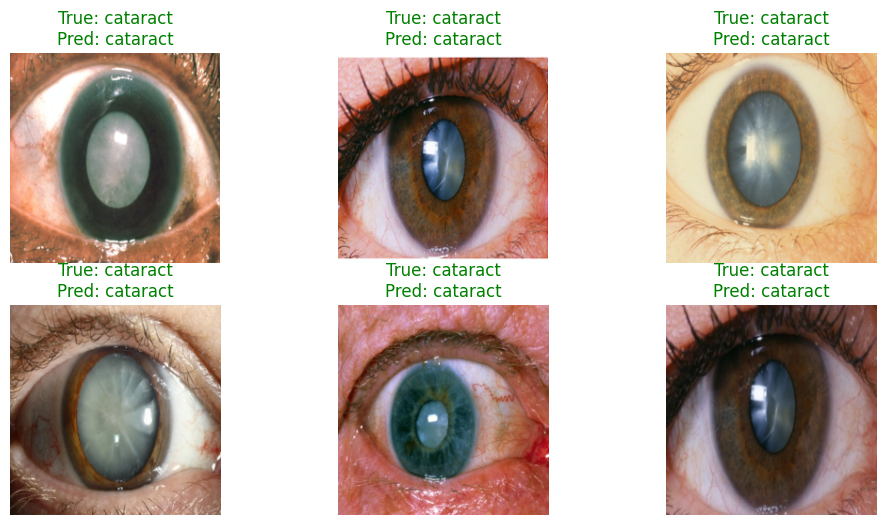

In [13]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean  # unnormalize
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title:
        plt.title(title)
    plt.axis('off')

# Show 6 images from test set with predictions
plt.figure(figsize=(12, 6))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    imshow(all_images[i])
    true_label = class_names[all_labels[i]]
    pred_label = class_names[all_preds[i]]
    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f'True: {true_label}\nPred: {pred_label}', color=color)
plt.show()


In [14]:
torch.save(model.state_dict(), 'cataract_model.pth')
